# Homework Optional - Feature Selection
For homework Optional, you will apply feature selection to real health datasets. This assignment is designed to provide hands-on practices. 

MAKE YOUR OWN COPY OF THIS FILE BEFORE YOU START. 

Complete each task and submit your Jupyter notebook on Blackboard.

# Section:
- Real-World Application - Child Mortality
- Sequential Forward Feature Selection
- Recurive Feature Elimination
- Permutation Feature Importance
- Real-World Application - Hospital Readmission (MS Student Only)
- Univariate Feature Imputation
  - Mean
  - Median
- Multivariate Feature Imputation

## To-Do Lists
Look out for sections marked "# IMPLEMENT" and "# QUESTION"
- Undergrads: 2 Implement Blocks + 1 Question Block - 3 Points Total
- Masters: 4 Implement Blocks + 2 Question Block - 6 Points Total

Partial credits will be given.

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.base import clone
from tqdm.notebook import tqdm
from copy import deepcopy
import matplotlib.pyplot as plt
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = 10, 10

## [1] Real-World Application - Child Mortality

Lowering child mortality rates is an important goal and one cost effective method is the use of Cardiotocograms (CTG). The CTG is a non-invasive fetal monitor which is used to asses fetal health during the pregnancy. The goal here wil be to accurately classify between normal and distressed fetal health, which can inform the timely use of surgical intervention such as cesarian delivery (C-section).   

The Cardiotocography Data Set consists of measurements of fetal heart rate (FHR) and uterine contraction (UC) features on cardiotocograms classified by expert obstetricians. https://archive.ics.uci.edu/ml/datasets/cardiotocography




In [ ]:
!wget -Nq https://raw.githubusercontent.com/csci499/feature_selection/main/fetal_health.csv

In [ ]:
df = pd.read_csv('fetal_health.csv') # read in infant mortality data
print(df.shape)
df.head()

(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
'''

Feature Description

baseline value - FHR baseline (beats per minute)
accelerations - # of accelerations per second
fetal_movement - # of fetal movements per second
uterine_contractions - # of uterine contractions per second
light_decelerations - # of light decelerations per second
severe_decelerations - # of severe decelerations per second
prolongued_decelerations - # of prolongued decelerations per second
abnormal_short_term_variability  - percentage of time with abnormal short term variability
mean_value_of_short_term_variability - mean value of short term variability
percentage_of_time_with_abnormal_long_term_variability - percentage of time with abnormal long term variability
mean_value_of_long_term_variability  - mean value of long term variability
histogram_width - width of FHR histogram
histogram_min - minimum of FHR histogram
histogram_max - Maximum of FHR histogram
histogram_number_of_peaks - # of histogram peaks
histogram_number_of_zeroes - # of histogram zeros
histogram_mode - histogram mode
histogram_mean - histogram mean
histogram_median - histogram median
histogram_variance - histogram variance
histogram_tendency - histogram tendency
fetal_health - fetal state class code (1=normal; 2=suspect; 3=pathologic)

'''

'\n\nFeature Description\n\nbaseline value - FHR baseline (beats per minute)\naccelerations - # of accelerations per second\nfetal_movement - # of fetal movements per second\nuterine_contractions - # of uterine contractions per second\nlight_decelerations - # of light decelerations per second\nsevere_decelerations - # of severe decelerations per second\nprolongued_decelerations - # of prolongued decelerations per second\nabnormal_short_term_variability  - percentage of time with abnormal short term variability\nmean_value_of_short_term_variability - mean value of short term variability\npercentage_of_time_with_abnormal_long_term_variability - percentage of time with abnormal long term variability\nmean_value_of_long_term_variability  - mean value of long term variability\nhistogram_width - width of FHR histogram\nhistogram_min - minimum of FHR histogram\nhistogram_max - Maximum of FHR histogram\nhistogram_number_of_peaks - # of histogram peaks\nhistogram_number_of_zeroes - # of histogr

In [ ]:
outcome = 'fetal_health'
df[outcome].value_counts() # get outcome class counts

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
df.isna().sum() # verify no null values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
X = df.drop(columns=[outcome])
y = df[outcome]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

X_train.shape: (1594, 21)
X_test.shape: (532, 21)


In [ ]:
sgdc = SGDClassifier(random_state=42) # this is linear SVM classifier
sgdc.fit(X_train, y_train) 
accuracy_all_feats = sgdc.score(X_test, y_test) # get baseline score for comparison

## [2] Forward Feature Selection

In [ ]:
""" 

    Implement forward feature selection.

    Given a model with feature matrix X of size NxM and target variable y
    of size Nx1 where N is the number of points and M is the number of features.

    Conduct forward feature selection. Each added feature is selected incrementally 
    through k-fold cross-validation and its default scoring function.     

    In each evaluation of adding a candidate feature, partition X and y into k partitions. Use k-fold cross-validation to train and 
    evaluate the model. You will use default scoring function for sklearn cross_validate.
    
    Suggestion: You can use sklearn.base.clone and sklearn.model_selection.cross_validate. 
    
    Outputs:
    feature_ranking: a list of all the features in descending order (order in which they are chosen)
    scores: associated k-fold model performance scores at each index of the feature_ranking list 

"""

def forward_feature_selection(model, X, y, k=5):
    # -------------------------------------------------------------------------
    # IMPLEMENT - 1 Point
    # -------------------------------------------------------------------------

    features = list(X.columns)
    feature_ranking = []
    scores = []
    
    for i in tqdm(range(X.shape[1])):
        best_score = 0
        next_feat = ''
        for feat in features:
            feature_ranking.append(feat)
            temp_X = X[feature_ranking]
            temp_scores = cross_validate(clone(model), temp_X, y, cv=k)
            temp_score = temp_scores['test_score'].mean()
            if temp_score > best_score:
                best_score = temp_score
                next_feat = feat
            feature_ranking.pop()
        feature_ranking.append(next_feat)
        features.remove(next_feat)
        scores.append(best_score)
        
    return feature_ranking, scores


  0%|          | 0/21 [00:00<?, ?it/s]

Optimal number of features: 16
Optimal features: ['histogram_mode', 'baseline value', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_mean', 'fetal_movement', 'accelerations', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'histogram_width', 'histogram_number_of_peaks', 'histogram_variance', 'histogram_median', 'abnormal_short_term_variability', 'histogram_min']


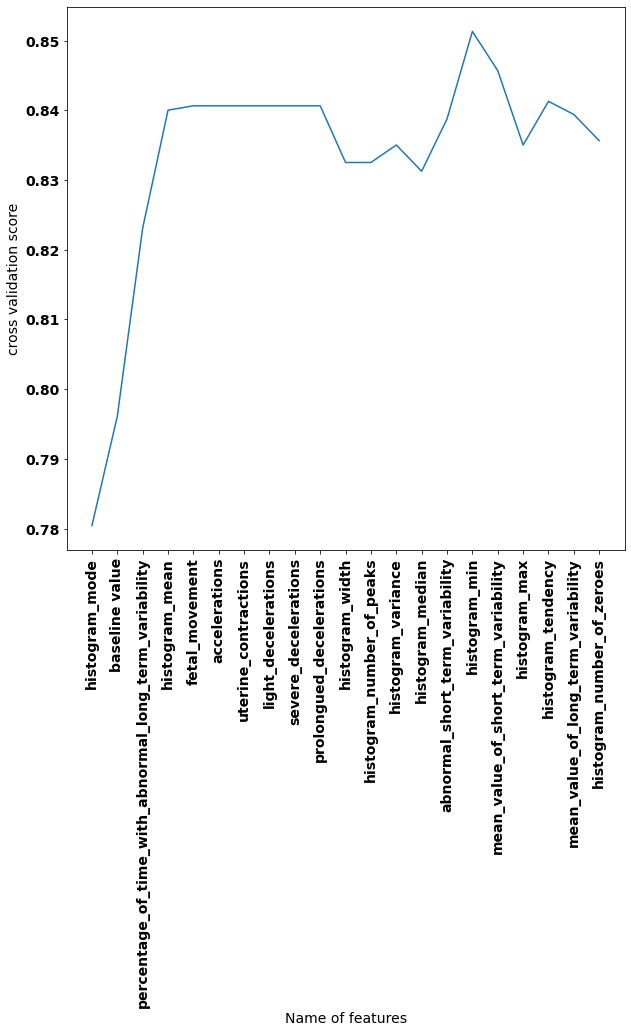

In [ ]:
# applying feature selection to the *train* dataset
feature_ranking, scores = forward_feature_selection(SGDClassifier(random_state=42), X_train, y_train)

# plot number of features VS. cross-validation scores
plt.xlabel("Name of features")
plt.xticks(range(1, len(scores)+1), feature_ranking, rotation = 90)
plt.ylabel("cross validation score")
plt.plot(list(range(1, len(scores)+1)), scores)

# find the feature set at which the best performance is achieved (max score)
selected_features = feature_ranking[:scores.index(max(scores))+1]
print("Optimal number of features:", len(selected_features))
print("Optimal features:", selected_features)

In [ ]:
# reduce data to only selected set of features
X_train_ffs = X_train[selected_features] # reduce feature set of X_train
X_test_ffs = X_test[selected_features] # reduce for X_test as well
print('X_train_ffs.shape', X_train_ffs.shape)
print('X_test_ffs.shape', X_test_ffs.shape)

X_train_ffs.shape (1594, 16)
X_test_ffs.shape (532, 16)


In [ ]:
# fit model with selected set of features 
sgdc_ffs = SGDClassifier(random_state=42)
sgdc_ffs.fit(X_train_ffs, y_train) 
accuracy_reduced_feats = sgdc_ffs.score(X_test_ffs, y_test)

# compare score with baseline result with all features above
print('test accuracy with all features', accuracy_all_feats)
print('test accuracy with selected features', accuracy_reduced_feats)

test accuracy with all features 0.8026315789473685
test accuracy with selected features 0.8477443609022557


## [3] Recursive Feature Elimination

In [ ]:
# here we are using an out-of-box feature selection library
# RFECV performs backward feature selection by fitting a model with all the features and programatically removing
# the weakest feature at each step until all features are exhausted

rfecv = RFECV(estimator=SGDClassifier(random_state=42), cv=5)
rfecv.fit(X_train, y_train)

selected_features = list(X_train.loc[:, rfecv.support_].columns)

Optimal number of features : 14
Optimal features: ['baseline value', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


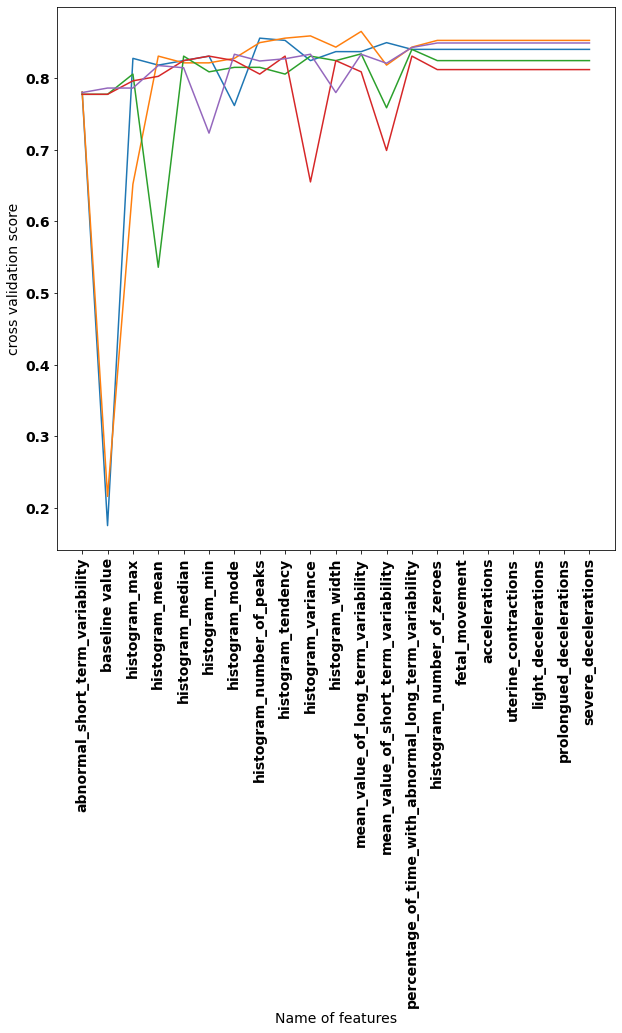

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)
print('Optimal features:', selected_features)
sorted_features = [x for _, x in sorted(zip(rfecv.ranking_, X_train.columns))]
# plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Name of features")
plt.xticks(range(1, X.shape[1]+1), sorted_features, rotation = 90)
plt.ylabel("cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
X_train_rfecv = X_train[selected_features] # reduce feature set for X_train
X_test_rfecv = X_test[selected_features] # reduce for X_test as well
print('X_train_rfecv.shape', X_train_rfecv.shape)
print('X_test_rfecv.shape', X_test_rfecv.shape)

X_train_rfecv.shape (1594, 14)
X_test_rfecv.shape (532, 14)


In [ ]:
# test how model fitted on trimmed data by recursive feature elimination performs
sgdc_rfecv = SGDClassifier(random_state=42)
sgdc_rfecv.fit(X_train_rfecv, y_train) 
sgdc_rfecv.score(X_test_rfecv, y_test)

0.8233082706766918

In [ ]:
'''

Q: Look at features selected by Forward Feature Selection and Recursive Feature
   Elimination if you were allowed to keep only ** 5 **. Do they have any overlap? If so, which one?

'''

# -------------------------------------------------------------------------
# QUESTION - 1 Point
# -------------------------------------------------------------------------

# Yes, 2 - baseline_value and histogram - mean. 

'\n\nQ: Look at features selected by Forward Feature Selection and Recursive Feature\n   Elimination if you were allowed to keep only ** 5 **. Do they have any overlap? If so, which one?\n\n'

## [4] Permutation Feature Importance

In [ ]:
""" 

    Implement permutation feature importance.

    Given a model with feature matrix X of size NxM and target variable y
    of size Nx1 where N is the number of points and M is the number of features.
    
    Fit matrix X and target variable y to obtain a baseline score. You will use default
    scoring function.

    Conduct K permutation feature importance. Each Feature is randomly shuffle and evaluated 
    by trained model as "permutation_score - baseline_score". Repeat this process N times
    for each feature.
    
    Outputs:
    feature_ranking: a list of all the features in descending order of permutation importance
    importance_scores: associated scores at each index of the feature_ranking list to quantify permutation importance

"""

def permutation_importance(model, X, y, k=5):
    # -------------------------------------------------------------------------
    # IMPLEMENT - 1 Point
    # -------------------------------------------------------------------------

    base_score = model.score(X, y)
    feat_score = []

    for feat in X.columns:
        X_copy = X.copy()
        mean_score = 0
        for i in range(k):
            X_copy[feat] = X_copy[feat].sample(frac=1).values
            perm_score = model.score(X_copy, y)
            mean_score += (perm_score - base_score)
        score = mean_score.mean()
        feat_score.append((feat, score))

    ranking = sorted(feat_score, key=lambda x: x[1], reverse=True)
    feature_ranking = [feat for feat, score in ranking]
    importance_scores = [score for feat, score in ranking]

    return feature_ranking, importance_scores

In [ ]:
feature_ranking, _ = permutation_importance(sgdc, X_test, y_test, n=5)
print("sgdc's important features:", feature_ranking)

feature_ranking, _ = permutation_importance(sgdc_ffs, X_test_ffs, y_test, n=5)
print("sgdc_ffs's important features:", feature_ranking)

feature_ranking, _ = permutation_importance(sgdc_rfecv, X_test_rfecv, y_test, n=5)
print("sgdc_rfecv's important features:", feature_ranking)

sgdc's important features: ['histogram_median', 'histogram_mode', 'histogram_number_of_peaks', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'histogram_number_of_zeroes', 'histogram_tendency', 'histogram_min', 'histogram_max', 'mean_value_of_short_term_variability', 'histogram_mean', 'mean_value_of_long_term_variability', 'histogram_variance', 'histogram_width', 'abnormal_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'baseline value']
sgdc_ffs's important features: ['fetal_movement', 'accelerations', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'histogram_variance', 'histogram_number_of_peaks', 'histogram_mode', 'histogram_median', 'histogram_min', 'baseline value', 'abnormal_short_term_variability', 'histogram_mean', 'percentage_of_time_with_abnormal_long_term_variability', 'histogram_width']
sgdc_rfecv's imp

## [5] Real-World Application - Hospital Readmission  (MS Student Only)

A hospital readmission is when a patient who is discharged from the hospital, gets re-admitted again within a certain period of time. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. In 2011, American hospitals spent over $41 billion on diabetic patients who got readmitted within 30 days of discharge. Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care. 


The Health Facts Database is a national data warehouse that collects comprehensive clinical records across hospitals throughout the United States. (https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission/data) Hospital_readmission.csv is generated from diabetic_data.csv, we filtered down to only numerical variables. Hospital_readmission_missing.csv is generated by creating missing values in hospital_readmission.csv.  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
!wget -Nq https://raw.githubusercontent.com/csci461/dataset/main/hospital_readmission.csv
!wget -Nq https://raw.githubusercontent.com/csci461/dataset/main/hospital_readmission_missing.csv

In [ ]:
df_hospital = pd.read_csv("hospital_readmission.csv") # read in hospital readmission data
df_hospital_missing = pd.read_csv("hospital_readmission_missing.csv") # read in hospital readmission data with missing values

In [ ]:
print(df_hospital.shape)
df_hospital.head()

(101766, 9)


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,1,41,0,1,0,0,0,1,0
1,3,59,0,18,0,0,0,9,1
2,2,11,5,13,2,0,1,6,0
3,2,44,1,16,0,0,0,7,0
4,1,51,0,8,0,0,0,5,0


In [ ]:
print(df_hospital_missing.shape)
df_hospital_missing.head()

(101766, 9)


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
0,1.0,41.0,0.0,NaN,0.0,0.0,NaN,1.0,0
1,3.0,59.0,0.0,18.0,0.0,0.0,NaN,9.0,1
2,2.0,11.0,5.0,13.0,2.0,0.0,1.0,NaN,0
3,2.0,44.0,1.0,16.0,0.0,0.0,NaN,7.0,0
4,1.0,51.0,0.0,8.0,0.0,0.0,0.0,5.0,0


In [ ]:
'''

Feature Description

"time_in_hospital": Integer number of days between admission and discharge
"num_lab_procedures": Number of lab tests performed during the encounter
"num_procedures": Number of procedures (other than lab tests) performed during the encounter
"num_medications": Number of distinct generic names administered during the encounter
"number_outpatient": Number of outpatient visits of the patient in the year preceding the encounter
"number_emergency": Number of emergency visits of the patient in the year preceding the encounter
"number_inpatient": Number of inpatient visits of the patient in the year preceding the encounter
"number_diagnoses": Number of diagnoses entered to the system
"readmitted": 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no
record of readmission. 0 - No, 1 - < 30 Days, 2 - > 30 Days.

'''

'\n\nFeature Description\n\n"time_in_hospital": Integer number of days between admission and discharge\n"num_lab_procedures": Number of lab tests performed during the encounter\n"num_procedures": Number of procedures (other than lab tests) performed during the encounter\n"num_medications": Number of distinct generic names administered during the encounter\n"number_outpatient": Number of outpatient visits of the patient in the year preceding the encounter\n"number_emergency": Number of emergency visits of the patient in the year preceding the encounter\n"number_inpatient": Number of inpatient visits of the patient in the year preceding the encounter\n"number_diagnoses": Number of diagnoses entered to the system\n"readmitted": 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no\nrecord of readmission. 0 - No, 1 - < 30 Days, 2 - > 30 Days.\n\n'

In [ ]:
'''

Q: What is the percentage of missing data in hospital_admission_missing.csv?

'''

print(df_hospital_missing.isnull().sum().sum() / (df_hospital_missing.shape[0]*df_hospital_missing.shape[1])*100)

# -------------------------------------------------------------------------
# QUESTION - 1 Point
# -------------------------------------------------------------------------

# 25%

25.001801518516338


In [ ]:
# set up random forest classifier
model = RandomForestClassifier(n_estimators=100,random_state=123)

In [ ]:
# set up feature matrix and target variable
X = df_hospital[["time_in_hospital","num_lab_procedures", "num_procedures", "num_medications",
       "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"]]
y = df_hospital["readmitted"]

X_missing = df_hospital_missing[["time_in_hospital","num_lab_procedures", "num_procedures", "num_medications",
       "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses"]]
y_missing = df_hospital_missing["readmitted"]

## [6] Univariate Feature Imputation

In [ ]:
'''

We will compare perfromace under the provided imputation and another two easy imputation strategies.

Given a model with feature matrix X of size NxM and target variable y
of size Nx1 where N is the number of points and M is the number of features.

Fit a random forest classifier on X and Y. Evaluate the model with 10-fold 
cross-validation on accuracy, precision_weighted, recall_weighted, f1_weighted.

Hint:
Use cross_val_score and set the scoring function.

Given a model with feature matrix X_missing of size NxM with some missing values 
and target variable y of size Nx1 where N is the number of points and M is 
the number of features.

Perform data imputation on X_missing. (1) Replace missing values with mean of 
each column. (2) Replace missing values with median of each column.

Fit a random forest classifier on X_missing and Y. Evaluate the model with 10-fold 
cross-validation on accuracy, precision_weighted, recall_weighted, f1_weighted. Do
this for both data imputation - mean and median.

Show results in a pandas dataframe.

Q: Compare model performance between data imputation - mean and median. Are the performance
   similar or different? Why? Look at descriptive statistics of hospital_admission_missing.csv. 

'''

# -------------------------------------------------------------------------
# IMPLEMENT - 1 Point
# -------------------------------------------------------------------------

imputation_method = []
score_list = []
mean_score = []
std_score = []
for score in ["accuracy","precision_weighted","recall_weighted","f1_weighted"]:
    cv_results = cross_val_score(model, X, y, scoring=score, cv=10)
    imputation_method.append("Original")
    score_list.append(score.split("_")[0].capitalize())
    mean_score.append(np.mean(cv_results))
    std_score.append(np.std(cv_results))

for score in ["accuracy","precision_weighted","recall_weighted","f1_weighted"]:
    cv_results = cross_val_score(model, X_missing.fillna(X_missing.mean()), y_missing, scoring=score, cv=10)
    imputation_method.append("Mean")
    score_list.append(score.split("_")[0].capitalize())
    mean_score.append(np.mean(cv_results))
    std_score.append(np.std(cv_results))

for score in ["accuracy","precision_weighted","recall_weighted","f1_weighted"]:
    cv_results = cross_val_score(model, X_missing.fillna(X_missing.median()), y_missing, scoring=score, cv=10)
    imputation_method.append("Median")
    score_list.append(score.split("_")[0].capitalize())
    mean_score.append(np.mean(cv_results))
    std_score.append(np.std(cv_results))

df_score = pd.DataFrame({"Imputation":imputation_method,"Error":score_list,"Mean":mean_score,"Std":std_score})
df_score = df_score.sort_values(["Error"]).reset_index(drop=True)
df_score

,Imputation,Error,Mean,Std
0,Original,Accuracy,0.573178,0.009420
1,Mean,Accuracy,0.562320,0.007873
2,Median,Accuracy,0.555775,0.007461
3,Original,F1,0.571302,0.010803
4,Mean,F1,0.559538,0.009312
5,Median,F1,0.553027,0.008659
6,Original,Precision,0.572728,0.010830
7,Mean,Precision,0.560578,0.008940
8,Median,Precision,0.553708,0.008230
9,Original,Recall,0.573178,0.009420


In [ ]:
df_hospital_missing.describe()

# The model performance is similar for data imputation - mean and median because 
# the mean and median is similar for each feature. 

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,72890.000000,73156.000000,73158.000000,73224.000000,73127.000000,73321.000000,73140.000000,73122.000000,101766.000000
mean,4.396694,43.116067,1.329820,16.022561,0.371901,0.198947,0.637941,7.423894,0.460881
std,2.985297,19.687846,1.701861,8.115544,1.296623,0.919829,1.267842,1.933004,0.498470
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,1.000000
max,14.000000,132.000000,6.000000,81.000000,42.000000,64.000000,21.000000,16.000000,1.000000


## [7] Multivariate Feature Imputation

Please go to (https://scikit-learn.org/stable/modules/impute.html) and
(https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer) to understand how Sklearn implements multivariate feature imputation. 

In [ ]:
imp = IterativeImputer(max_iter=10, random_state=123)

In [ ]:
'''

Given a model with feature matrix X of size NxM and target variable y
of size Nx1 where N is the number of points and M is the number of features.

Fit a random forest classifier on X and Y. Evaluate the model with 10-fold 
cross-validation on accuracy, precision_weighted, recall_weighted, f1_weighted.

Hint:
Use cross_val_score and set the scoring function.

Given a model with feature matrix X_missing of size NxM with some missing values 
and target variable y of size Nx1 where N is the number of points and M is 
the number of features.

** Perform multivariate data imputation on X_missing.

Fit a random forest classifier on X_missing and Y. Evaluate the model with 10-fold 
cross-validation on accuracy, precision_weighted, recall_weighted, f1_weighted. 

Show results in a pandas dataframe.

Q: Compare model performance between data imputation - mean, median, and multivariate. 
   Are the performance similar or different? Why? Look at missing data percentage in
   hospital_admission_missing.csv for all features. 

'''

imp.fit(X_missing)
X_im = np.round(imp.transform(X_missing))

for score in ["accuracy","precision_weighted","recall_weighted","f1_weighted"]:
    cv_results = cross_val_score(model, X_im, y_missing, scoring=score, cv=10)
    imputation_method.append("Multivariate")
    score_list.append(score.split("_")[0].capitalize())
    mean_score.append(np.mean(cv_results))
    std_score.append(np.std(cv_results))

df_score2 = pd.DataFrame({"Imputation":imputation_method,"Error":score_list,"Mean":mean_score,"Std":std_score})
df_score2 = df_score2.sort_values(["Error"]).reset_index(drop=True)
df_score2

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,Imputation,Error,Mean,Std
0,Original,Accuracy,0.573178,0.009420
1,Mean,Accuracy,0.562320,0.007873
2,Median,Accuracy,0.555775,0.007461
3,Multivariate,Accuracy,0.557878,0.006356
4,Original,F1,0.571302,0.010803
5,Mean,F1,0.559538,0.009312
6,Median,F1,0.553027,0.008659
7,Multivariate,F1,0.555636,0.007694
8,Original,Precision,0.572728,0.010830
9,Mean,Precision,0.560578,0.008940


In [ ]:
print(df_hospital_missing.isnull().sum() / (df_hospital_missing.shape[0]*df_hospital_missing.shape[1])*100)

# The model performance is similar for data imputation - mean, median, and multivariate because 
# the missing data percentage for all features is quite small (~3%). 

time_in_hospital      3.152767
num_lab_procedures    3.123724
num_procedures        3.123506
num_medications       3.116299
number_outpatient     3.126890
number_emergency      3.105709
number_inpatient      3.125471
number_diagnoses      3.127436
readmitted            0.000000
dtype: float64
